In [119]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Display the first few rows
df.head()


,Filename,Class,Image_Width,Image_Height,A_Count,A_AvgX,A_AvgY,A_StdX,A_StdY,A_BoxRatio,...,Resh_AvgY,Resh_StdX,Resh_StdY,Resh_BoxRatio,Taf_Count,Taf_AvgX,Taf_AvgY,Taf_StdX,Taf_StdY,Taf_BoxRatio
0,Alexander_204.png,Alexander,1880.0,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1063.0,0.0,0.0,0.743902,1.0,1212.5,564.5,0.0,0.0,1.090452
1,Alexander_42.png,Alexander,1604.0,1604.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Alexander_56.png,Alexander,543.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,Alexander_95.png,Alexander,521.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,...,363.5,0.0,0.0,0.830986,1.0,208.0,228.0,0.0,0.0,0.729730
4,Alexander_199.png,Alexander,377.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277.5,0.0,0.0,0.698413,0.0,0.0,0.0,0.0,0.0,0.000000


In [120]:
# Find rows where Image_Width or Image_Height is 0
invalid_rows = df[(df["Image_Width"] == 0) | (df["Image_Height"] == 0)]
print("Images with zero width/height:")
display(invalid_rows)  # If using Jupyter Notebook

df = df[(df["Image_Width"] > 0) & (df["Image_Height"] > 0)]
print(f"Remaining images after removal: {len(df)}")

Images with zero width/height:


,Filename,Class,Image_Width,Image_Height,A_Count,A_AvgX,A_AvgY,A_StdX,A_StdY,A_BoxRatio,...,Resh_AvgY,Resh_StdX,Resh_StdY,Resh_BoxRatio,Taf_Count,Taf_AvgX,Taf_AvgY,Taf_StdX,Taf_StdY,Taf_BoxRatio
491,Judah_141.png,Judah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Remaining images after removal: 825


In [121]:
# Drop the 'filename' column
df_cleaned = df.drop(columns=["Filename"], errors="ignore")

# Display first rows after removal
df_cleaned.head()

,Class,Image_Width,Image_Height,A_Count,A_AvgX,A_AvgY,A_StdX,A_StdY,A_BoxRatio,Bet_Count,...,Resh_AvgY,Resh_StdX,Resh_StdY,Resh_BoxRatio,Taf_Count,Taf_AvgX,Taf_AvgY,Taf_StdX,Taf_StdY,Taf_BoxRatio
0,Alexander,1880.0,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1063.0,0.0,0.0,0.743902,1.0,1212.5,564.5,0.0,0.0,1.090452
1,Alexander,1604.0,1604.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Alexander,543.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,Alexander,521.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,363.5,0.0,0.0,0.830986,1.0,208.0,228.0,0.0,0.0,0.729730
4,Alexander,377.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,277.5,0.0,0.0,0.698413,0.0,0.0,0.0,0.0,0.0,0.000000


In [122]:
len(df[df['Class']=="Alexander"]) , len(df[df['Class']=="John"]), len(df[df['Class']=="Judah"])

(199, 222, 404)

In [123]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [124]:
# # Display summary statistics
# print(df_cleaned.describe())
#
# # Plot distributions of numerical features
# import matplotlib.pyplot as plt
#
# df_cleaned.hist(figsize=(12, 10), bins=30)
# plt.show()

In [125]:
# Drop Image_Width and Image_Height (not useful in final dataset)
df_cleaned = df_cleaned.drop(columns=["Image_Width", "Image_Height"])

In [126]:
# Save a separate copy of non-normalized data before modifying df_cleaned
df_notNorm = df_cleaned.copy()

In [127]:
# Compute the total number of letters detected in each image
letter_columns = [col for col in df_cleaned.columns if "_Count" in col]  # Find all letter count columns
df_cleaned["Total_Letters"] = df_cleaned[letter_columns].sum(axis=1)  # Sum all letter counts

# Normalize counts by total detected letters
for col in letter_columns:
    df_cleaned[col] = df_cleaned[col] / df_cleaned["Total_Letters"]

# Fill NaN (if Total_Letters = 0)
df_cleaned[letter_columns] = df_cleaned[letter_columns].fillna(0)

In [128]:
# Find all X and Y coordinate columns
x_columns = [col for col in df_cleaned.columns if "_AvgX" in col]
y_columns = [col for col in df_cleaned.columns if "_AvgY" in col]

# Normalize by image width & height
for col in x_columns:
    df_cleaned[col] = df_cleaned[col] / df["Image_Width"]

for col in y_columns:
    df_cleaned[col] = df_cleaned[col] / df["Image_Height"]

In [129]:
std_x_columns = [col for col in df_cleaned.columns if "_StdX" in col]
std_y_columns = [col for col in df_cleaned.columns if "_StdY" in col]

# Normalize by image dimensions
for col in std_x_columns:
    df_cleaned[col] = df_cleaned[col] / df["Image_Width"]

for col in std_y_columns:
    df_cleaned[col] = df_cleaned[col] / df["Image_Height"]

In [130]:
df_cleaned = df_cleaned.drop(columns=["Total_Letters"])  # No longer needed

In [131]:
df_cleaned.head() # Check if values look reasonable

,Class,A_Count,A_AvgX,A_AvgY,A_StdX,A_StdY,A_BoxRatio,Bet_Count,Bet_AvgX,Bet_AvgY,...,Resh_AvgY,Resh_StdX,Resh_StdY,Resh_BoxRatio,Taf_Count,Taf_AvgX,Taf_AvgY,Taf_StdX,Taf_StdY,Taf_BoxRatio
0,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.641223,0.560106,...,0.565426,0.0,0.0,0.743902,0.0500,0.644947,0.300266,0.0,0.0,1.090452
1,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.338840,0.544888,...,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000
2,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000
3,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.437620,0.718810,...,0.697697,0.0,0.0,0.830986,0.0625,0.399232,0.437620,0.0,0.0,0.729730
4,Alexander,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.641910,0.737401,...,0.736074,0.0,0.0,0.698413,0.0000,0.000000,0.000000,0.0,0.0,0.000000


In [132]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the class labels
df_cleaned["Class"] = label_encoder.fit_transform(df_cleaned["Class"])
df_notNorm["Class"] = label_encoder.transform(df_notNorm["Class"])  # Apply same transformation

# Save mapping for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"✅ Class Encoding Mapping: {class_mapping}")

✅ Class Encoding Mapping: {'Alexander': 0, 'John': 1, 'Judah': 2}


In [133]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=["Class"])  # Features
y = df_cleaned["Class"]  # Labels

X_raw = df_notNorm.drop(columns=["Class"])  # Features
y_raw = df_notNorm["Class"]

In [134]:
test_size = 0.1
random_state = 42


# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=test_size, random_state=random_state, stratify=df_notNorm["Class"]
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 742, Testing samples: 83


In [135]:
import numpy as np

print("Feature Means:\n", X_train.mean(axis=0))
print("\nFeature Standard Deviations:\n", X_train.std(axis=0))

Feature Means:
 A_Count         0.004118
A_AvgX          0.045522
A_AvgY          0.022356
A_StdX          0.000000
A_StdY          0.000000
                  ...   
Taf_AvgX        0.105331
Taf_AvgY        0.065279
Taf_StdX        0.000155
Taf_StdY        0.000020
Taf_BoxRatio    0.149400
Length: 84, dtype: float64

Feature Standard Deviations:
 A_Count         0.013576
A_AvgX          0.147403
A_AvgY          0.079447
A_StdX          0.000000
A_StdY          0.000000
                  ...   
Taf_AvgX        0.230824
Taf_AvgY        0.145986
Taf_StdX        0.003795
Taf_StdY        0.000522
Taf_BoxRatio    0.333294
Length: 84, dtype: float64


In [136]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameters to test
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

# Initialize k-NN model
knn = KNeighborsClassifier()

# Use GridSearch to find the best combination
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"✅ Best k-NN Parameters: {best_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Train k-NN with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate on test set
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)

print(f"✅ Best k-NN Test Accuracy: {accuracy_best_knn:.4f}")

✅ Best k-NN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
✅ Best Cross-Validation Accuracy: 0.8638
✅ Best k-NN Test Accuracy: 0.8554


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Max depth (None = unlimited)
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]  # Minimum samples per leaf
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_raw, y_train_raw)

# Get best parameters
best_rf_params = grid_search.best_params_
best_rf_accuracy = grid_search.best_score_

print(f"✅ Best Random Forest Parameters: {best_rf_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_rf_accuracy:.4f}")

# Train best model
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_raw, y_train_raw)

# Evaluate on test set
y_pred_best_rf = best_rf.predict(X_test_raw)
accuracy_best_rf = accuracy_score(y_test_raw, y_pred_best_rf)

print(f"✅ Best Random Forest Test Accuracy: {accuracy_best_rf:.4f}")

✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
✅ Best Cross-Validation Accuracy: 0.9285
✅ Best Random Forest Test Accuracy: 0.9157


In [138]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initialize XGBoost
xgb = XGBClassifier(random_state=42, eval_metric="mlogloss")

# Perform Grid Search
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train_raw, y_train_raw)

# Best parameters
best_xgb_params = grid_search_xgb.best_params_
best_xgb_accuracy = grid_search_xgb.best_score_

print(f"✅ Best XGBoost Parameters: {best_xgb_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_xgb_accuracy:.4f}")

# Train best XGBoost model
best_xgb = XGBClassifier(**best_xgb_params, random_state=42)
best_xgb.fit(X_train_raw, y_train_raw)

# Evaluate on test set
y_pred_xgb = best_xgb.predict(X_test_raw)
accuracy_xgb = accuracy_score(y_test_raw, y_pred_xgb)

print(f"✅ Best XGBoost Test Accuracy: {accuracy_xgb:.4f}")

✅ Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
✅ Best Cross-Validation Accuracy: 0.9299
✅ Best XGBoost Test Accuracy: 0.9639


In [139]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

# Initialize SVM
svm = SVC(random_state=42)

# Perform Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best parameters
best_svm_params = grid_search_svm.best_params_
best_svm_accuracy = grid_search_svm.best_score_

print(f"✅ Best SVM Parameters: {best_svm_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_svm_accuracy:.4f}")

# Train best SVM model
best_svm = SVC(**best_svm_params, random_state=42)
best_svm.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"✅ Best SVM Test Accuracy: {accuracy_svm:.4f}")

✅ Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
✅ Best Cross-Validation Accuracy: 0.9312
✅ Best SVM Test Accuracy: 0.9157


In [140]:
from sklearn.neural_network import MLPClassifier

# Define parameter grid
param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01]
}

# Initialize MLP
mlp = MLPClassifier(max_iter=500, random_state=42)

# Perform Grid Search
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# Best parameters
best_mlp_params = grid_search_mlp.best_params_
best_mlp_accuracy = grid_search_mlp.best_score_

print(f"✅ Best MLP Parameters: {best_mlp_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_mlp_accuracy:.4f}")

# Train best MLP model
best_mlp = MLPClassifier(**best_mlp_params, max_iter=500, random_state=42)
best_mlp.fit(X_train, y_train)

# Evaluate on test set
y_pred_mlp = best_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"✅ Best MLP Test Accuracy: {accuracy_mlp:.4f}")

✅ Best MLP Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
✅ Best Cross-Validation Accuracy: 0.9299
✅ Best MLP Test Accuracy: 0.9639


In [141]:
from sklearn.ensemble import VotingClassifier

# Define the best models
best_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
best_xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.2, random_state=42)
best_knn = KNeighborsClassifier(n_neighbors=7, weights="distance", metric="manhattan")  # Adjust if SVM is better

# Combine models into a voting classifier (majority rule)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('knn', best_knn)  # Swap for SVM if needed
    ],
    voting='hard'  # "hard" means majority rule
)

# Train on raw data (since k-NN uses normalized data, we need to choose models carefully)
voting_clf.fit(X_train_raw, y_train_raw)

# Evaluate accuracy
y_pred_voting = voting_clf.predict(X_test_raw)
accuracy_voting = accuracy_score(y_test_raw, y_pred_voting)

print(f"⚡ Voting Classifier Accuracy: {accuracy_voting:.4f}")

⚡ Voting Classifier Accuracy: 0.9277


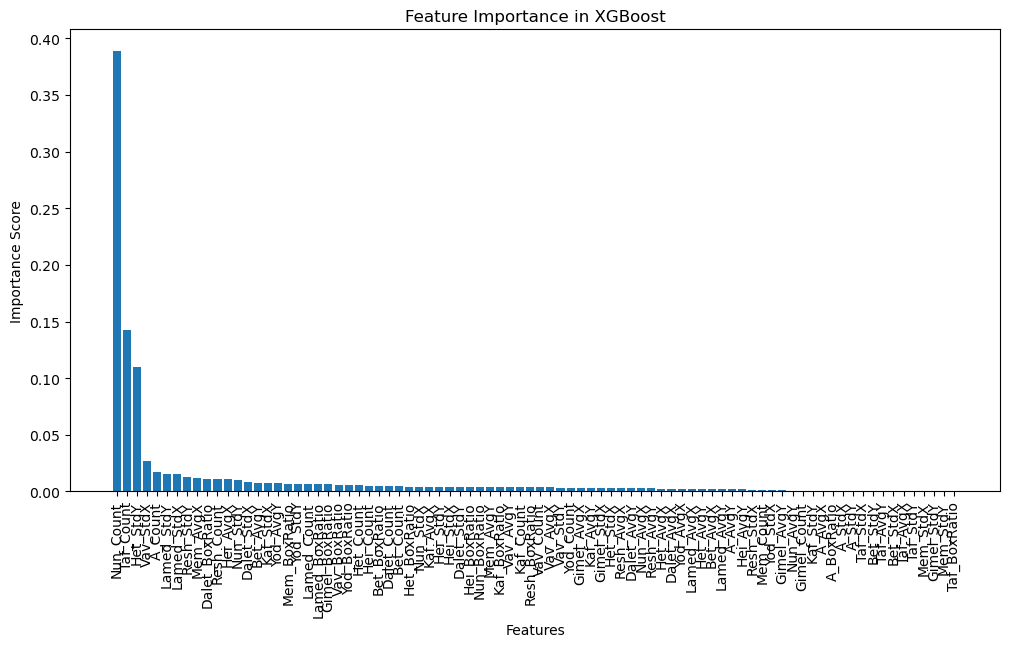

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost if it hasn't been trained
if not hasattr(best_xgb, "feature_importances_"):
    best_xgb.fit(X_train_raw, y_train_raw)

# Get feature importance
feature_importance = best_xgb.feature_importances_
feature_names = X_train_raw.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot top features
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.title("Feature Importance in XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [145]:
import pandas as pd
import numpy as np

# Get feature importance from XGBoost
feature_importance_df = pd.DataFrame(
    {"Feature": X_train_raw.columns, "Importance": best_xgb.feature_importances_}
)

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("🔹 Top Features Used for Classification:")
print(feature_importance_df.head(15))

🔹 Top Features Used for Classification:
           Feature  Importance
66       Nun_Count    0.388330
78       Taf_Count    0.142692
40        Het_StdY    0.109986
33        Vav_StdX    0.027087
0          A_Count    0.017555
58      Lamed_StdY    0.015306
57      Lamed_StdX    0.015260
76       Resh_StdY    0.012556
61        Mem_AvgX    0.011454
23  Dalet_BoxRatio    0.011189
72      Resh_Count    0.011180
25        Hei_AvgX    0.010642
70        Nun_StdY    0.010179
21      Dalet_StdX    0.008462
8         Bet_AvgY    0.007869


In [149]:
from xgboost import to_graphviz

# Export the first tree to a Graphviz file
tree_graph = to_graphviz(best_xgb, num_trees=0, rankdir="LR")

# Save as an SVG (scalable vector format, best for zooming)
tree_graph.render("xgboost_tree", format="svg", cleanup=True)

# Save as a PDF for high-quality printing
tree_graph.render("xgboost_tree", format="pdf", cleanup=True)

print("✅ Tree exported as 'xgboost_tree.svg' and 'xgboost_tree.pdf'.")

✅ Tree exported as 'xgboost_tree.svg' and 'xgboost_tree.pdf'.


In [153]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "xgboost_ruler_classifier.pkl")

print("✅ Model saved as 'xgboost_ruler_classifier.pkl'")

✅ Model saved as 'xgboost_ruler_classifier.pkl'


In [154]:
# Load the saved model
loaded_xgb = joblib.load("xgboost_ruler_classifier.pkl")

# Test if it predicts correctly
sample_input = X_test_raw.iloc[:1]  # Take a single test example
predicted_ruler = loaded_xgb.predict(sample_input)

print(f"✅ Model successfully loaded. Predicted class: {predicted_ruler[0]}")

✅ Model successfully loaded. Predicted class: 2
